### Multiple Linear Regression Model
The goal of this section is to build a multiple linear regression model and estimate the linear relationship between one continuous dependent variable and two or more independent variables.

In [ ]:
#  Imports 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score    
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


## EDA and checking assumptions

In [2]:
#Load the dataset
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv', index_col=0)

In [5]:
df0.shape

(22699, 17)

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 1

In [6]:
#check for missing data and duplicates
df0.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [12]:
df = df0.drop_duplicates().reset_index(drop=True)

## Convert columns to datetime

In [13]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [14]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

## Calculate the duration of the trips (minutes)

In [15]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0   
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [16]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


## Analize the outliers 

Text(0.5, 1.0, 'duration Boxplot')

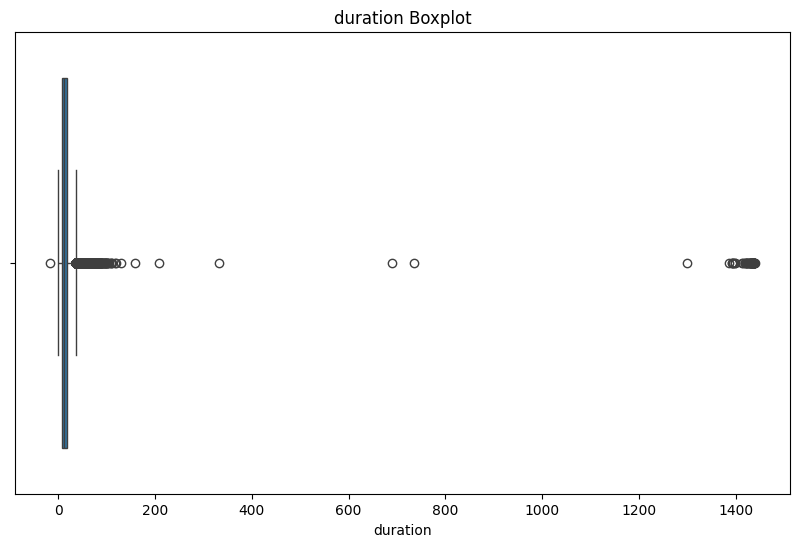

In [19]:
# boxpot of duration, trip distance, and fare amount
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['duration'])
plt.title('duration Boxplot')  

Text(0.5, 1.0, 'Boxplot of trip_distance')

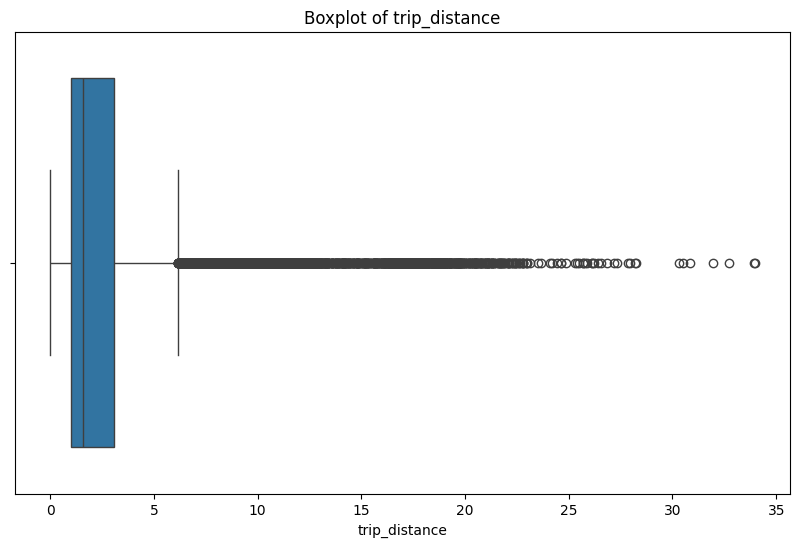

In [18]:
# boxpot of duration, trip distance, and fare amount
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot of trip_distance')   

Text(0.5, 1.0, 'Fare Amount Boxplot')

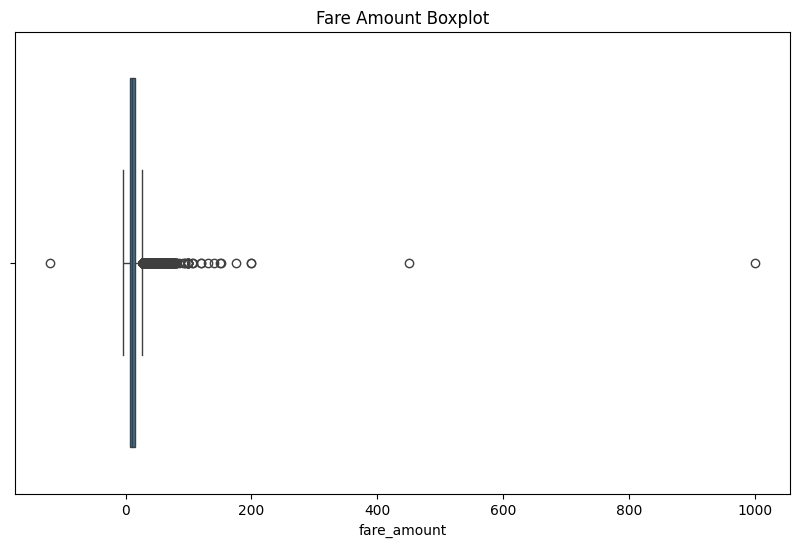

In [20]:
# boxpot of duration, trip distance, and fare amount
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Boxplot')  

There are plenty of outliers in duration , trip distance and amount.  The zero value don't make sense.  Maybe they are input errors or round down values.  I will investigate how many of this values there are

In [21]:
sorted_trip_distance = df['trip_distance'].sort_values()
sorted_trip_distance.head(10)

22026    0.0
795      0.0
6908     0.0
13561    0.0
12238    0.0
6878     0.0
14372    0.0
20638    0.0
920      0.0
16263    0.0
Name: trip_distance, dtype: float64